<div>
    <em><h1>Health Marketing</h1></em>
    <img width="10%" height="10%" src='pics/aiHealth_01.jpg'/>
    
    
</div>
<div>
    <p>
    <em>Stap 5:</em>
    <br>
    <em>Data interpretatie: modelleren</em>
        <br>
    <em>Author: Hans Olthoff</em>
    </p>    
</div>

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

Get data

In the db are 3 tables: df1, df2, df3

df1 is the complete set (NaNs replaced by mean value)
df2 has extra colum BMI
df3 has extra colum BMI AND outliers are removed

In [31]:
dbConnection = sqlite3.connect('../rest_server_new/medisch_centrum_randstad/db.sqlite3')

In [32]:
df = pd.read_sql_query(f"SELECT * FROM {'df2'}", dbConnection)

In [33]:
dbConnection.close()

In [98]:
df = pd.read_csv('data/df2.csv')

Fit to model

In [100]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split

In [102]:
# divide dataset into X predictors and y target
# X = df.drop(['index', 'lifespan'], axis=1)
X = df.drop(['lifespan'], axis=1)
y = df[['lifespan']]

# split data 80% training and 20% test with random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# divide dataset into X predictors and y target
X = df.drop(['index', 'mass', 'length', 'lifespan'], axis=1)
y = df[['lifespan']]

# split data 80% training and 20% test with random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
regr = linear_model.LinearRegression()
regr.fit(X, y) 

LinearRegression()

RSME zegt hoeveel zit het gemiddeld van de lifespan tiv wat het model er van maakt dus hoe lager de RSME dan is het model beter want een lagere error is een betere voorspelling.

Je kan ook kijken naar de derdeling van de RSMEs.

Je kan ook:
- je model testen
- lse en r squared bekijken
- decision tree en random forest proberen
- 





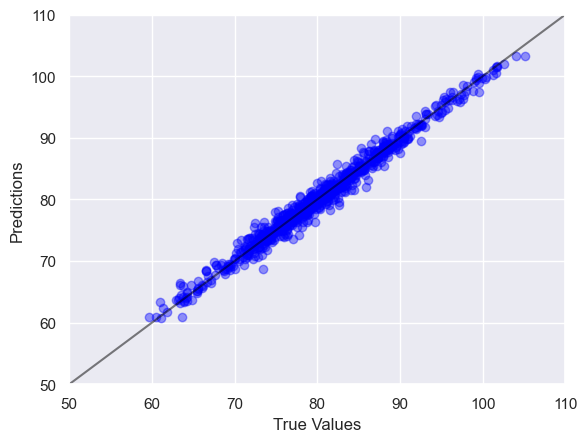

In [104]:
# y_test is called p_test, because y_test already exists
p_test = regr.predict(X_test)
 
plt.scatter(y_test,p_test,c='blue', alpha=0.4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
 
# plot diagonal line for comparison (prediction is exact)
lims=[50,110]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims,lims,c='black',alpha=0.5)
plt.show()

LSE or Least Square Error to make the error as small as possible. That is what happens with FIT
And the RMSE is the check on the fit.

In [105]:
score = regr.score(X_test,y_test)
# hier gebruik je de testdata om te checken

In [106]:
display(score)
# dit geeft R^2 en dat is de accuraatheid van het model

0.9813763542328945

R^2 or R squared to look at the quality of the fit

RMSE or Root Mean Squared Error is hoe ver prediction afzit van de werkelijke waarde.


In [108]:
# Example code for next field
# from sklearn.metrics import mean_squared_error
# p_test = regr.predict(test.drop(columns=['lifespan','length','mass']))
 
# mse = mean_squared_error(test.lifespan, p_test)
# import math
# rmse = (math.sqrt(mse))
# print(rmse)

In [109]:
# X_test heeft geen lifespan, dus drop hoeft niet
# X_test.lifespan = y_test

from sklearn.metrics import mean_squared_error
p_test = regr.predict(X_test)
 
mse = mean_squared_error(y_test, p_test)
import math
rmse = (math.sqrt(mse))
print(rmse)

1.0739164342221432


,genetic,length,mass,exercise,smoking,alcohol,sugar,BMI
599,80.8,178.0,90.3,2.5,10.4,1.0,8.6,28.500189
752,67.3,174.0,135.3,5.3,0.1,5.3,10.9,44.688862
2016,80.0,208.0,54.6,0.9,3.7,3.8,6.7,12.620192
1001,96.6,196.0,98.2,4.3,13.9,1.8,7.1,25.562266
2514,78.6,193.0,128.7,2.3,3.3,0.1,3.8,34.551263
...,...,...,...,...,...,...,...,...
2840,84.8,205.0,139.4,0.7,8.7,0.5,8.6,33.170732
1420,76.6,181.0,54.9,3.0,5.5,0.3,7.5,16.757730
67,81.7,197.0,64.2,3.8,13.8,3.3,3.1,16.542555
3514,69.6,184.0,59.4,3.6,5.8,1.8,6.7,17.544896


In [62]:
#Test met test_invoer: daarvoor neem je de gem waarden. je kan bij invoer ook de min en max aangeven

genetic = 82.28 # min=63.90 max=102.20
length = 183.89 # min = 154.00
mass = 92.28
alcohol = 2.27
sugar = 6.49
smoking = 9.81
exercise = 2.40
BMI = round(mass/((length/100)**2))

In [91]:
X_input = [genetic, length, mass, exercise, smoking, alcohol, sugar, BMI]
# dit moet een dict zijn met de {'colum':value, etc}

In [89]:
#andere manier: X_input bepalen obv de coefficient
# de coeff is de a in y = ax + b en b0 is de optesom van alle individuele b's in y = ax +b
# y = a1x1 + a2x2 +... b0

# The coefficients
print('Coefficients: \n', regr.coef_)
print(f'b0 would be:',regr.predict([[0,0,0,0,0,0,0,0]]))

# lifespan = genetic*1.00 + length*(-0.06) + etc

Coefficients: 
 [[ 1.00124824 -0.05630156  0.05600071  0.803213   -0.26400501 -0.22066634
  -0.07307898 -0.2572765 ]]
b0 would be: [[11.73722495]]


/home/pans/miniconda3/envs/miw/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [90]:
# df.keys().drop('index') * regr.coef_[0]


# list(df.keys().drop('index'))
# list(regr.coef_[0])

# (list(df.keys().drop('index')))*(list(regr.coef_[0]))
lifespan =  X_input * list(regr.coef_[0])

TypeError: can't multiply sequence by non-int of type 'list'

In [59]:
df.mean()

index       2046.673115
genetic       82.278624
length       183.885162
mass          92.275930
exercise       2.403477
smoking        9.809035
alcohol        2.266846
lifespan      80.177693
sugar          6.487169
BMI           27.682015
dtype: float64

In [ ]:
df.describe()

In [ ]:
p_input = regr.predict(X_input)